# Assignment 1: Preprocessing and Text Classification

Student Name: Yvonne Tao

Student ID: 1183577

# General Info

<b>Due date</b>: Monday, 27 March 2023 1pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day (both week and weekend days counted)

<b>Marks</b>: 9% of mark for class (with 8% on correctness + 1% on quality and efficiency of your code)

<b>Materials</b>: See "Using Jupyter Notebook and Python" page on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, Gensim, Keras and Pytorch. We recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3.8</b>.  

To familiarize yourself with NLTK, here is a free online book:  Steven Bird, Ewan Klein, and Edward Loper (2009). <a href=https://www.nltk.org/book/>Natural Language Processing with Python</a>. O'Reilly Media Inc. You may also consult the <a href=https://www.nltk.org/api/nltk.html>NLTK API</a>.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each question is worth is explicitly given. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place. In regards to the use of artificial intelligence tools in the context of academic integrity, please see the university's statement <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies">here</a>.

# Overview

In this homework, you'll be working with a collection of tweets. The task is to predict the geolocation (country) where the tweet comes from. This homework involves writing code to preprocess data and perform text classification.

# Preprocessing (4 marks)

**Instructions**: Download the data (as1-data.json) from Canvas and put it in the same directory as this iPython notebook. Run the code below to load the json data. This produces two objects, `x` and `y`, which contains a list of  tweets and corresponding country labels (it uses the standard [2 letter country code](https://www.iban.com/country-codes)) respectively. **No implementation is needed.**

In [3]:
import json

x = []
y = []
data = json.load(open("as1-data.json"))
for k, v in data.items():
    x.append(k)
    y.append(v)
    
print("Number of tweets =", len(x))
print("Number of labels =", len(y))
print("\nSamples of data:")
for i in range(10):
    print("Country =", y[i], "\tTweet =", x[i])
    
assert(len(x) == 943)
assert(len(y) == 943)

Number of tweets = 943
Number of labels = 943

Samples of data:
Country = us 	Tweet = @Addictd2Success thx u for following
Country = us 	Tweet = Let's just say, if I were to ever switch teams, Khalesi would be top of the list. #girlcrush
Country = ph 	Tweet = Taemin jonghyun!!! Your birits make me go~ http://t.co/le8z3dntlA
Country = id 	Tweet = depart.senior 👻 rapat perdana (with Nyayu, Anita, and 8 others at Ruang Aescullap FK Unsri Madang) — https://t.co/swRALlNkrQ
Country = ph 	Tweet = Done with internship with this pretty little lady!  (@ Metropolitan Medical Center w/ 3 others) [pic]: http://t.co/1qH61R1t5r
Country = gb 	Tweet = Wow just Boruc's clanger! Haha Sunday League stuff that, Giroud couldn't believe his luck! #clown
Country = my 	Tweet = I'm at Sushi Zanmai (Petaling Jaya, Selangor) w/ 5 others http://t.co/bcNobykZ
Country = us 	Tweet = Mega Fest!!!! Its going down🙏🙌  @BishopJakes
Country = gb 	Tweet = @EllexxxPharrell wow love the pic babe xx
Country = us 	Tweet = You 

### Question 1 (1.0 mark)

**Instructions**: Next we need to preprocess the collected tweets to create a bag-of-words representation (based on frequency). The preprocessing steps required here are: (1) tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`); (2) lowercase all words; (3) remove any word that does not contain any English letters in the alphabet (e.g. {_hello_, _#okay_, _abc123_} would be kept, but not {_123_, _!!_}) and (4) remove stopwords (based on NLTK `stopwords`). An empty tweet (after preprocessing) and its country label should be **excluded** from the output (`x_processed` and `y_processed`).

**Task**: Complete the `preprocess_data(data, labels)` function. The function takes **a list of tweets** and **a corresponding list of country labels** as input, and returns **two lists**. For the first list, each element is a bag-of-words representation of a tweet (represented using a python dictionary). For the second list, each element is a corresponding country label. Note that while we do not need to preprocess the country labels (`y`), we need to have a new output list (`y_processed`) because some tweets maybe removed after the preprocessing (due to having an empty set of bag-of-words).

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [4]:
import nltk
import collections
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

import re

tt = TweetTokenizer()
stopwords = set(stopwords.words('english')) #note: stopwords are all in lowercase

def preprocess_data(data, labels):
    
    ###
    # Your answer BEGINS HERE
    ###
    x_processed = []
    y_processed = []

    for tweet,label in zip(data,labels):
        
        bag_of_words = collections.defaultdict(int)
        
        # tokenize each tweet into individual word tokens
        tokens = tt.tokenize(tweet)
     
        for token in tokens:
            # lowercase all words;
            token = token.lower()
            
            # remove any word that does not contain any English letters
            if not re.search(r'(?<=)[a-zA-Z]+', token):
                #print("--------------------------removed")
                continue

            # remove stopwords (based on NLTK `stopwords`) 
            if token in stopwords:
                continue
            
            bag_of_words[token] += 1

        if len(bag_of_words) > 0:
            x_processed.append(bag_of_words)
            y_processed.append(label)
        else:
            print("Excluded", tokens)

    return x_processed, y_processed
    ###
    # Your answer ENDS HERE
    ###

x_processed, y_processed = preprocess_data(x, y)

print("Number of preprocessed tweets =", len(x_processed))
print("Number of preprocessed labels =", len(y_processed))
print("\nSamples of preprocessed data:")
for i in range(10):
    print("Country =", y_processed[i], "\tTweet =", x_processed[i])

Number of preprocessed tweets = 943
Number of preprocessed labels = 943

Samples of preprocessed data:
Country = us 	Tweet = defaultdict(<class 'int'>, {'@addictd2success': 1, 'thx': 1, 'u': 1, 'following': 1})
Country = us 	Tweet = defaultdict(<class 'int'>, {"let's": 1, 'say': 1, 'ever': 1, 'switch': 1, 'teams': 1, 'khalesi': 1, 'would': 1, 'top': 1, 'list': 1, '#girlcrush': 1})
Country = ph 	Tweet = defaultdict(<class 'int'>, {'taemin': 1, 'jonghyun': 1, 'birits': 1, 'make': 1, 'go': 1, 'http://t.co/le8z3dntla': 1})
Country = id 	Tweet = defaultdict(<class 'int'>, {'depart.senior': 1, 'rapat': 1, 'perdana': 1, 'nyayu': 1, 'anita': 1, 'others': 1, 'ruang': 1, 'aescullap': 1, 'fk': 1, 'unsri': 1, 'madang': 1, 'https://t.co/swrallnkrq': 1})
Country = ph 	Tweet = defaultdict(<class 'int'>, {'done': 1, 'internship': 1, 'pretty': 1, 'little': 1, 'lady': 1, 'metropolitan': 1, 'medical': 1, 'center': 1, 'w': 1, 'others': 1, 'pic': 1, 'http://t.co/1qh61r1t5r': 1})
Country = gb 	Tweet = defau

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/momotaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**For your testing**:

In [25]:
assert(len(x_processed) == len(y_processed))
assert(len(x_processed) > 800)

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [26]:
def get_all_hashtags(data):
    hashtags = set([])
    for d in data:
        for word, frequency in d.items():
            if word.startswith("#") and len(word) > 1:
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(x_processed)
print("Number of hashtags =", len(hashtags))
print(sorted(hashtags))

Number of hashtags = 425
['#100percentpay', '#1stsundayofoctober', '#1yearofalmostisneverenough', '#2011prdctn', '#2015eebritishfilmacademyawards', '#2k16', '#2littlebirds', '#365picture', '#5sosacousticatlanta', '#5sosfam', '#8thannualpubcrawl', '#affsuzukicup', '#aflpowertigers', '#ahimacon14', '#aim20', '#airasia', '#allcity', '#alliswell', '#allwedoiscurls', '#amazing', '#anferneehardaway', '#ariona', '#art', '#arte', '#artwork', '#ashes', '#asian', '#asiangirl', '#askcrawford', '#askherforfback', '#askolly', '#asksteven', '#at', '#australia', '#awesome', '#awesomepict', '#barcelona', '#bart', '#bayofislands', '#beautiful', '#bedimages', '#bell', '#beringmy', '#bettybooppose', '#bff', '#big', '#bigbertha', '#bigbreakfast', '#blackhat', '#blessedmorethanicanimagine', '#blessedsunday', '#blogtourambiente', '#bluemountains', '#bonekachika', '#boomtaob', '#booyaa', '#bored', '#boredom', '#bradersisterhood', '#breaktime', '#breedingground', '#bringithomemy', '#brooksengland', '#burgers'

### Question 2 (1.0 mark)

**Instructions**: Our task here to tokenize the hashtags, by implementing the **MaxMatch algorithm** discussed in class.

NLTK has a list of words that you can use for matching, see starter code below (`words`). Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words (`words`) includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching (provided by the function `lemmatize(word)`). Note that the list of words (`words`) is the only source that you'll use for matching (i.e. you do not need to find  other external word lists). If you are unable to make any longer match, your code should default to matching a single letter.

For example, given "#newrecords", the algorithm should produce: \["#", "new", "records"\].

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [27]:
from nltk.corpus import wordnet
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK
words = set([ word.lower() for word in words ]) #lowercase all the words for better matching

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma


def tokenize_hashtags(hashtags):
    ###
    # Your answer BEGINS HERE
    ###

    hashtag_dictionary = {}

    for hashtag in hashtags:
        token_list = []
        idx_start = 0
        idx_end = len(hashtag) - 1
        while idx_end >= idx_start:
            temp = hashtag[idx_start: idx_end + 1]
            if lemmatize(temp) in words or len(temp) == 1:
                token_list.append(temp)
                idx_start = idx_end + 1
                idx_end = len(hashtag) - 1
            else:
                idx_end -= 1
        hashtag_dictionary[hashtag] = token_list
    return hashtag_dictionary
    ###
    # Your answer ENDS HERE
    ###

#tokenise hashtags with MaxMatch
tokenized_hashtags = tokenize_hashtags(hashtags)

#print results
for k, v in sorted(tokenized_hashtags.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'vega', 'n']
#veganfood ['#', 'vega', 'n', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'coca', 'm']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'wear', 'e', '9', '0', 's']
#wearesocial ['#', 'weares', 'o', 'c', 'i', 'al']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'wo', 'k']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'ama', 's']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


[nltk_data] Downloading package words to /Users/momotaro/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/momotaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/momotaro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**For your testing:**

In [28]:
assert(len(tokenized_hashtags) == len(hashtags))
assert(tokenized_hashtags["#newrecord"] == ["#", "new", "record"])

### Question 3 (1.0 mark)

**Instructions**: Our next task is to tokenize the hashtags again, but this time using a **reversed version of the MaxMatch algorithm**, where matching begins at the end of the hashtag and progresses backwards (e.g. for <i>#helloworld</i>, we would process it right to left, starting from the last character <i>d</i>). Just like before, you should use the provided word list (`words`) for word matching.

**Task**: Complete the `tokenize_hashtags_rev(hashtags)` function by the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [29]:
def tokenize_hashtags_rev(hashtags):
    ###
    # Your answer BEGINS HERE
    ###
    hashtag_dictionary = {}

    for hashtag in hashtags:
        token_list = []
        idx_start = len(hashtag) - 1
        idx_end = 0
        while idx_end <= idx_start:
            temp = hashtag[idx_end : idx_start+1]
            if lemmatize(temp) in words or len(temp) == 1:
                token_list.insert(0,temp)
                idx_start = idx_end - 1
                idx_end = 0
            else:
                idx_end += 1
        hashtag_dictionary[hashtag] = token_list
    return hashtag_dictionary

    ###
    # Your answer ENDS HERE
    ###

    
#tokenise hashtags with the reversed version of MaxMatch
tokenized_hashtags_rev = tokenize_hashtags_rev(hashtags)

#print results
for k, v in sorted(tokenized_hashtags_rev.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'v', 'e', 'gan']
#veganfood ['#', 'v', 'e', 'gan', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'c', 'o', 'cam']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'we', 'are', '9', '0', 's']
#wearesocial ['#', 'we', 'are', 'social']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'w', 'ok']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'a', 'mas']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


**For your testing:**

In [30]:
assert(len(tokenized_hashtags_rev) == len(hashtags))
assert(tokenized_hashtags_rev["#newrecord"] == ["#", "new", "record"])

### Question 4 (1.0 mark)

**Instructions**: The two versions of MaxMatch will produce different results for some of the hashtags. For a hastag that has different results, our task here is to use a **unigram language model** (lecture 3) to score them to see which is better. Recall that in a unigram language model we compute P(<i>#</i>, <i>hello</i>, <i>world</i> = P(<i>#</i>)\*P(<i>hellow</i>)\*P(<i>world</i>).

You should: (1) use the NLTK's Brown corpus (`brown_words`) for collecting word frequencies (note: the words are already tokenised so no further tokenisation is needed); (2) lowercase all words in the corpus; (3) use add-one smoothing when computing the unigram probabilities; and (4) work in the log space to prevent numerical underflow.

**Task**: Build a unigram language model with add-one smoothing using the word counts from the Brown corpus. Iterate through the hashtags, and for each hashtag where MaxMatch and reversed MaxMatch produce different results, print the following: (1) the hashtag; (2) the results produced by MaxMatch and reversed MaxMatch; and (3) the log probability of each result as given by the unigram language model. Note: you **do not** need to print the hashtags where MaxMatch and reversed MaxMatch produce the same results.

An example output:
```
1. #abcd
MaxMatch = [#, a, bc, d]; LogProb = -2.3
Reversed MaxMatch = [#, a, b, cd]; LogProb = -3.5

2. #efgh
MaxMatch = [#, ef, g, h]; LogProb = -4.2
Reversed MaxMatch = [#, e, fgh]; LogProb = -3.1

```

Have a look at the output, and see if the sequences with better language model scores (i.e. less negative) are generally more coherent.

In [48]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

import math
from collections import Counter

#words from brown corpus
brown_words = brown.words()

###
# Your answer BEGINS HERE
###
brown_length = len(brown_words)

#save brown words in lower case to a new list
lower_brown = []
for word in brown_words:
    lower_word = word.lower()
    lower_brown.append(lower_word)
brown_unique_count = len(set(lower_brown))

smoothing = 1
idx = 1
for hashtag in sorted(hashtags):
    
    if tokenized_hashtags[hashtag] == tokenized_hashtags_rev[hashtag]:
        continue
    else:

        prob = 1
        for token in tokenized_hashtags[hashtag]:
            token_count = lower_brown.count(token)
            prob = prob * ((token_count + smoothing) / (brown_length + brown_unique_count))

        prob_rev = 1
        for token in tokenized_hashtags_rev[hashtag]:
            token_count = lower_brown.count(token)
            prob_rev = prob_rev * ((token_count+smoothing) / (brown_length + brown_unique_count))

        print(f"{idx}. {hashtag}")
        print(f"MaxMatch = {tokenized_hashtags[hashtag]}; LogProb = {round(math.log(prob),1)}")
        print(f"Reversed MaxMatch = {tokenized_hashtags_rev[hashtag]}; LogProb = {round(math.log(prob_rev),1)}")
    idx += 1
###
# Your answer ENDS HERE
###

[nltk_data] Downloading package brown to /Users/momotaro/nltk_data...
[nltk_data]   Package brown is already up-to-date!


1. #1stsundayofoctober
MaxMatch = ['#', '1', 'st', 'sunday', 'ofo', 'c', 'tobe', 'r']; LogProb = -92.7
Reversed MaxMatch = ['#', '1', 'st', 'sunday', 'of', 'october']; LogProb = -58.7
2. #1yearofalmostisneverenough
MaxMatch = ['#', '1', 'year', 'of', 'almost', 'is', 'never', 'enough']; LogProb = -60.9
Reversed MaxMatch = ['#', '1', 'year', 'of', 'al', 'mos', 'tis', 'never', 'enough']; LogProb = -86.9
3. #8thannualpubcrawl
MaxMatch = ['#', '8', 'than', 'nu', 'alp', 'u', 'b', 'crawl']; LogProb = -90.1
Reversed MaxMatch = ['#', '8', 'th', 'annual', 'pub', 'crawl']; LogProb = -71.6
4. #affsuzukicup
MaxMatch = ['#', 'a', 'f', 'fs', 'u', 'z', 'u', 'k', 'i', 'cup']; LogProb = -104.6
Reversed MaxMatch = ['#', 'a', 'f', 'f', 'suz', 'u', 'k', 'i', 'cup']; LogProb = -91.4
5. #ahimacon14
MaxMatch = ['#', 'ah', 'ima', 'con', '1', '4']; LogProb = -67.2
Reversed MaxMatch = ['#', 'a', 'hi', 'macon', '1', '4']; LogProb = -58.8
6. #alliswell
MaxMatch = ['#', 'all', 'is', 'well']; LogProb = -32.0
Reverse

# Text Classification (4 marks)

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict the country of origin of a given tweet. The task here is to create training, development and test partitions from the preprocessed data (`x_processed`) and convert the bag-of-words representation into feature vectors.

**Task**: Create training, development and test partitions with a 70%/15%/15% ratio. Remember to preserve the ratio of the classes for all your partitions. That is, say we have only 2 classes and 70% of instances are labelled class A and 30% of instances are labelled class B, then the instances in training, development and test partitions should also preserve this 7:3 ratio. You may use sklearn's builtin functions for doing data partitioning.

Next, turn the bag-of-words dictionary of each tweet into a feature vector. You may also use sklearn's builtin functions for doing this (but if you don't want to use sklearn that's fine).

You should produce 6 objects: `x_train`, `x_dev`, `x_test` which contain the input feature vectors, and `y_train`, `y_dev` and `y_test` which contain the labels.

In [48]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

x_train, x_dev, x_test = None, None, None
y_train, y_dev, y_test = None, None, None

###
# Your answer BEGINS HERE
###

def prepare_data(x_processed,y_processed):
    # Create training, development and test partitions
    x_train, x_remaining, y_train, y_remaining = train_test_split(\
        x_processed, y_processed, test_size=0.3, random_state=0, stratify=y_processed)
    x_dev, x_test, y_dev, y_test = train_test_split(\
        x_remaining, y_remaining, test_size=0.5, random_state=0, stratify=y_remaining)

    # Convert the bag-of-words representation into a feature vector
    vectorizer = DictVectorizer()
    x_train = vectorizer.fit_transform(x_train)
    x_dev = vectorizer.transform(x_dev)
    x_test = vectorizer.transform(x_test)
    return x_train, x_dev, x_test, y_train, y_dev, y_test, vectorizer

x_train, x_dev, x_test, y_train, y_dev, y_test, vectorizer = prepare_data(x_processed,y_processed)
###
# Your answer ENDS HERE
###

### Question 6 (1.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation hyper-parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the **accuracy** with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance (accuracy) for different hyper-parameter settings.

The best parameters for Naive Bayes classifier are {'alpha': 0.48255220427412776, 'class_prior': None, 'fit_prior': True} with a score of 0.28


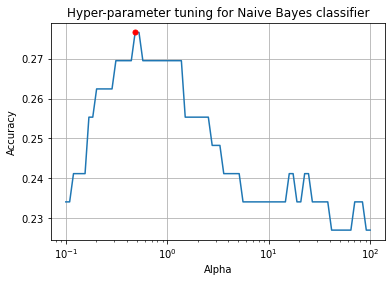

The best parameters for Logistic Regression classifier are {'C': 0.0008858667904100823, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 20, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} with a score of 0.32


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###
# Your answer BEGINS HERE
###

"""
Classifiers: Naive Bayes
"""
alpha_range = np.logspace(-1, 2, 80)
best_accuracy_nb = 0
accuracy_record = []

for alpha in alpha_range:
    naive_bayes_classifier = MultinomialNB(alpha = alpha)
    naive_bayes_classifier.fit(x_train,y_train)
    y_dev_pred = naive_bayes_classifier.predict(x_dev)
    accuracy_nb = accuracy_score(y_dev, y_dev_pred)
    accuracy_record.append(accuracy_nb)

    if accuracy_nb > best_accuracy_nb:
        best_accuracy_nb = accuracy_nb
        best_param_nb = naive_bayes_classifier.get_params()

print(f"The best parameters for Naive Bayes classifier are {best_param_nb} with a score of {round(best_accuracy_nb,2)}")


# Plot the accuracy scores against the alpha values
plt.plot(alpha_range, accuracy_record)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Hyper-parameter tuning for Naive Bayes classifier')
plt.grid(True)
# Mark the best alpha value with a red dot
plt.plot(best_param_nb['alpha'], best_accuracy_nb, 'ro', markersize=5)
plt.show()


"""
Classifiers: Logistic Regression
"""
penalty_range = ['l2', 'elasticnet', 'none']
C_range = np.logspace(-4,2,20)
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter_range = [10,15,20,25,50,100,150]

best_accuracy_lr = 0
accuracy_record = []

for penalty in penalty_range:
    for c in C_range:
        for solver in solvers:
            for max_iter in max_iter_range:
                try:
                    logistic_regression_classifier = LogisticRegression(
                    penalty = penalty,
                    C = c,
                    solver = solver,
                    max_iter = max_iter
                    )

                    logistic_regression_classifier.fit(x_train,y_train)
                    x_dev_pred = logistic_regression_classifier.predict(x_dev)
                    accuracy_lr = accuracy_score(y_dev, x_dev_pred)
                    accuracy_record.append(accuracy_lr)

                    if accuracy_lr > best_accuracy_lr:
                        best_accuracy_lr = accuracy_lr
                        best_param_lr = logistic_regression_classifier.get_params()
                except:
                        # in case this combination does not exist
                        continue
                
   
print(f"The best parameters for Logistic Regression classifier are {best_param_lr} with a score of {round(best_accuracy_lr,2)}")

###
# Your answer ENDS HERE
###


### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both **accuracy** and **macro-averaged F-score** for each classifier. Be sure to label your output. You may use sklearn's inbuilt functions.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using their optimal hyper-parameter settings based on their development performance.

In [20]:
###
# Your answer BEGINS HERE
###
"""
Classifiers: Naive Bayes
"""
best_nb_classifier = MultinomialNB()
best_nb_classifier.set_params(**best_param_nb)
best_nb_classifier.fit(x_train,y_train)
y_test_pred = best_nb_classifier.predict(x_test)
print (best_nb_classifier)
print(classification_report(y_test,y_test_pred))

"""
Classifiers: Logistic Regression
"""
best_lr_classifier = LogisticRegression()
best_lr_classifier.set_params(**best_param_lr)
best_lr_classifier.fit(x_train,y_train)
y_test_pred = best_lr_classifier.predict(x_test)
print(best_lr_classifier)
print(classification_report(y_test,y_test_pred))

###
# Your answer ENDS HERE
###

MultinomialNB(alpha=0.48255220427412776)
              precision    recall  f1-score   support

          au       0.19      0.33      0.24        15
          ca       0.08      0.07      0.07        15
          de       0.50      0.12      0.20         8
          gb       0.50      0.27      0.35        15
          id       0.43      0.20      0.27        15
          my       0.33      0.40      0.36        15
          ph       0.38      0.40      0.39        15
          sg       0.75      0.43      0.55        14
          us       0.14      0.20      0.17        15
          za       0.17      0.27      0.21        15

    accuracy                           0.27       142
   macro avg       0.35      0.27      0.28       142
weighted avg       0.34      0.27      0.28       142

LogisticRegression(C=0.0008858667904100823, max_iter=20, penalty='none',
                   solver='saga')
              precision    recall  f1-score   support

          au       0.25      0.13     

### Question 8 (1.0 mark)

**Instructions**: Print the most important features and their weights for each class for the two classifiers.


**Task**: For each of the classifiers (Logistic Regression and Naive Bayes) you've built in the previous question, print out the top-20 features (words) with the highest weight for each class (countries).

An example output:
```
Classifier = Logistic Regression

Country = au
aaa (0.999) bbb (0.888) ccc (0.777) ...

Country = ca
aaa (0.999) bbb (0.888) ccc (0.777) ...

Classifier = Naive Bayes

Country = au
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...

Country = ca
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...
```

Have a look at the output, and see if you notice any trend/pattern in the words for each country.

In [72]:
###
# Your answer BEGINS HERE
###
import math

"""
Classifiers: Naive Bayes
"""
print("Classifier = Naive Bayes\n")

countries = best_nb_classifier.classes_
features = vectorizer.get_feature_names()

for country_idx, country in enumerate(countries):

    print(f"Country = {country}")
    top_features = sorted(zip(best_nb_classifier.feature_log_prob_[country_idx], features), reverse=True)[:20]
    for top_feature in top_features:
        feature = top_feature[1]
        weight = top_feature[0]
        print(f"{feature} ({weight:.1f})", end = " ")
    print("\n")

"""
Classifiers: Logistic Regression
"""
print("Classifier = Logistic Regression\n")

for country_idx, country in enumerate(countries):
    print(f"Country = {country}")
    top_features = sorted(zip(best_lr_classifier.coef_[country_idx],features),reverse=True)[:20]
    for top_feature in top_features:
        feature = top_feature[1]
        weight = top_feature[0]
        print(f"{feature} ({weight:.3f})", end = " ")
    print("\n")
###
# Your answer ENDS HERE
###

Classifier = Naive Bayes

Country = au
melbourne (-6.0) i'm (-6.0) great (-6.0) one (-6.2) love (-6.2) make (-6.4) little (-6.4) keep (-6.4) would (-6.7) win (-6.7) visit (-6.7) victoria (-6.7) vca (-6.7) two (-6.7) tomorrow (-6.7) team (-6.7) take (-6.7) song (-6.7) sledging (-6.7) shows (-6.7) 

Country = ca
i'm (-5.8) thing (-6.0) got (-6.0) right (-6.2) great (-6.2) get (-6.2) first (-6.2) u (-6.4) school (-6.4) one (-6.4) life (-6.4) bed (-6.4) year (-6.7) way (-6.7) want (-6.7) wait (-6.7) w (-6.7) victoria (-6.7) uncle (-6.7) today (-6.7) 

Country = de
posted (-6.3) photo (-6.3) night (-6.3) love (-6.3) year (-6.6) tages (-6.6) please (-6.6) picture (-6.6) never (-6.6) medinger (-6.6) markus (-6.6) https://t.co/dpfrjtdarl (-6.6) good (-6.6) germany (-6.6) factory (-6.6) enough (-6.6) done (-6.6) des (-6.6) day (-6.6) bild (-6.6) 

Country = gb
x (-5.8) sure (-5.9) i'm (-5.9) got (-5.9) well (-6.1) new (-6.1) i've (-6.1) hope (-6.1) beat (-6.1) right (-6.4) plz (-6.4) get (-6.4)